# **Visualizando o que as CNNs aprendem**

Iremo usar o **Keras com um TensorFlow 2.0** para visualizar o seguinte (veja abaixo). Isso o ajuda a entender melhor o que está acontecendo nos bastidores e a desmistificar alguns dos aspectos da aprendizagem profunda.
1. Treinamento de uma CNN básica no conjunto de dados MNIST
2. Visualizar seus filtros
3. Visualizar as ativações do filtro à medida que propagamos uma imagem de entrada

# **Training a Basic CNN on the MNIST Dataset**

In [ ]:

from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test)  = mnist.load_data()


from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


print("Forma ou dimensões iniciais do x_train", str(x_train.shape))

print ("Número de amostras em nossos dados de treinamento: " + str(len(x_train)))
print ("Número de rótulos em nossos dados de treinamento:" + str(len(y_train)))
print ("Número de amostras em nossos dados de teste:  " + str(len(x_test)))
print ("Número de rótulos em nossos dados de teste: " + str(len(y_test)))

print("\n")
print ("Dimensões de x_train:" + str(x_train[0].shape))
print ("Rótulos em x_train:" + str(y_train.shape))
print("\n")
print ("Dimensões de x_test:" + str(x_test[0].shape))
print ("Rótulos em y_test:" + str(y_test.shape))

2025-05-12 22:59:20.557480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747101560.724828     634 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747101560.769730     634 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747101561.158223     634 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747101561.158244     634 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747101561.158245     634 computation_placer.cc:177] computation placer alr

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3833323841570188388
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5905580032
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12590055227250234171
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


I0000 00:00:1747101569.394623     634 gpu_device.cc:2019] Created device /device:GPU:0 with 5632 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Obtendo nossos dados na “forma” correta necessária para o Keras
# Precisamos adicionar uma quarta dimensão aos nossos dados, alterando assim nossa
# Nossa forma de imagem original de (60000,28,28) para (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Armazenar a forma de uma única imagem 
input_shape = (img_rows, img_cols, 1)

# Altere nosso tipo de imagem para o tipo de dados float32
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize nossos dados alterando o intervalo de (0 a 255) para (0 a 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical

# aplicando o onehot encoder
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


**Arquitetura**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

/home/gabs/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747101651.728485     634 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5632 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
batch_size = 128
epochs = 10

# Armazene nossos resultados aqui para que possamos plotar mais tarde
# Em nossa função de ajuste, especificamos nossos conjuntos de dados (x_train e y_train), 
# o tamanho do lote (normalmente de 16 a 128, dependendo de sua RAM), o número de 
# épocas (geralmente de 10 a 100) e nossos conjuntos de dados de validação (x_test e y_test)
# verbose = 1, define nosso treinamento para gerar métricas de desempenho a cada época

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# Obtemos nossa pontuação de precisão usando a função evaluate
# A pontuação contém dois valores, nossa perda de teste e a precisão
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10


I0000 00:00:1747101670.265853     812 service.cc:152] XLA service 0x7f814c003e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747101670.265890     812 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-12 23:01:10.422843: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747101670.538059     812 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-12 23:01:11.804061: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_140', 4 bytes spill stores, 4 bytes spill loads

2025-05-12 23:01:12.534611: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 13

 32/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1420 - loss: 2.2978

I0000 00:00:1747101675.343988     812 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2511 - loss: 2.2616

2025-05-12 23:01:18.576930: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_320', 88 bytes spill stores, 88 bytes spill loads

2025-05-12 23:01:19.101350: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 188 bytes spill stores, 188 bytes spill loads

2025-05-12 23:01:19.472078: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 496 bytes spill stores, 496 bytes spill loads

2025-05-12 23:01:19.718615: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 784 bytes spill stores, 784 bytes spill loads

2025-05-12 23:01:19.861655: I external

469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2528 - loss: 2.2610 - val_accuracy: 0.6099 - val_loss: 2.0773
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6679 - loss: 1.9010 - val_accuracy: 0.7996 - val_loss: 1.0200
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8107 - loss: 0.8478 - val_accuracy: 0.8676 - val_loss: 0.5037
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8673 - loss: 0.4899 - val_accuracy: 0.8928 - val_loss: 0.3907
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8891 - loss: 0.3955 - val_accuracy: 0.9056 - val_loss: 0.3430
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8997 - loss: 0.3518 - val_accuracy: 0.9107 - val_loss: 0.3139
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9040 - loss: 0.3308 - val_accuracy: 0.9173 - val_loss: 0.2922
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9110 - loss: 0.3071 - val_accuracy: 0.9193 - v

2025-05-12 23:01:48.685487: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads



Test loss: 0.2543613016605377
Test accuracy: 0.926800012588501


## Obtenha as saídas simbólicas de cada layer “key” (demos a elas nomes exclusivos).

In [5]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <Conv2D name=conv2d, built=True>,
 'conv2d_1': <Conv2D name=conv2d_1, built=True>,
 'max_pooling2d': <MaxPooling2D name=max_pooling2d, built=True>,
 'flatten': <Flatten name=flatten, built=True>,
 'dense': <Dense name=dense, built=True>,
 'dense_1': <Dense name=dense_1, built=True>}

## Obtenha as formas apenas de nossos filtros conv

In [ ]:

for layer in model.layers:
  
  
  if 'conv' not in layer.name:
    continue

  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


## **Vamos dar uma olhada nos pesos da nossa primeira camada de convolução**

In [ ]:

filters, biases = model.layers[0].get_weights()

In [ ]:

print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[ 0.02897271,  0.04174726,  0.03887487,  0.19351295,
           0.20913644, -0.10724751,  0.05521048, -0.10940452,
           0.00902098,  0.03902451, -0.05535788,  0.11402512,
          -0.09428194, -0.08809341,  0.219264  ,  0.13128728,
           0.07747633,  0.08538628,  0.16086622, -0.08839   ,
          -0.04062249,  0.24419086, -0.09289753, -0.08901308,
          -0.11408685, -0.12088515, -0.0424923 ,  0.08775742,
          -0.11630228,  0.01786469, -0.03450928, -0.13970926]],

        [[-0.1048329 ,  0.00983945,  0.0883079 ,  0.06551097,
           0.09094685, -0.08961143,  0.08451835, -0.11488672,
           0.23109946, -0.0979539 ,  0.02820711,  0.30100876,
           0.02658325,  0.1430889 ,  0.30146772, -0.01648316,
           0.11219103,  0.07122757,  0.15031767, -0.11864892,
          -0.05748108,  0.1714402 , -0.13501798, -0.02734147,
          -0.07658008,  0.00474489, -0.03448809, -0.06873424,
           0.01760725,  0.1781829 , -0.07015178,  0.04064712]],

  

In [ ]:

print(biases.shape)
biases

(32,)


array([ 6.8630744e-04,  1.1448285e-05,  3.2465577e-03,  1.1273732e-02,
        3.8476202e-03, -2.3117098e-03,  6.4957784e-03, -6.4073866e-03,
        1.0212825e-02,  5.5038352e-03,  5.1592067e-02,  1.7793333e-02,
       -2.0029396e-02,  6.7837788e-03,  5.2665863e-03,  2.6778614e-02,
        8.2639745e-06,  2.0549409e-02,  2.6806226e-02, -8.2143933e-06,
        1.5148042e-03,  3.8188333e-05, -1.5088128e-03, -9.0177422e-03,
       -1.2836386e-03,  2.1965783e-02, -1.1530162e-03, -4.2537600e-03,
        1.7669594e-02,  1.0239460e-03, -2.1554531e-05,  5.2724857e-02],
      dtype=float32)

## Vamos normalizar os valores do filtro para 0-1 para que possamos visualizá-los**

Nossos pesos de filtro variam

In [ ]:

f_min, f_max = filters.min(), filters.max()
print(f'Antes da Normalização, Min = {f_min} and Max =  {f_max}')
filters = (filters - f_min) / (f_max - f_min)
print(f'Após a Normalização, Min = {filters.min()} and Max =  {filters.max()}')

Before Normalisation, Min = -0.15076452493667603 and Max =  0.31185978651046753
After Normalisation, Min = 0.0 and Max =  1.0


**Visualize nossos filtros treinados**

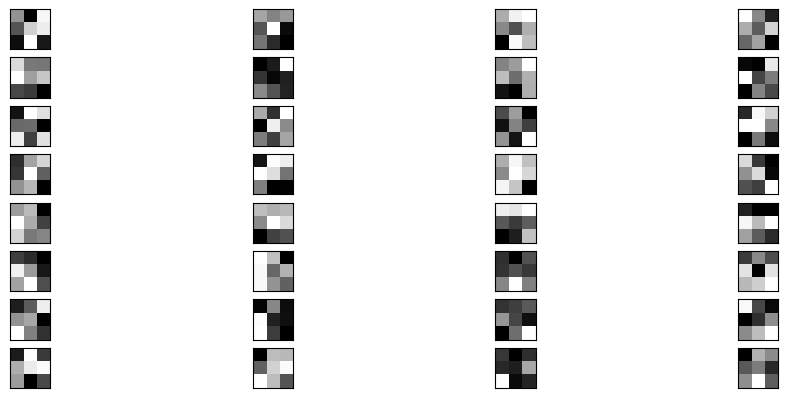

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


n_filters, ix = 32, 1
plt.figure(figsize=(12,20))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
   
    ax = plt.subplot(n_filters, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.imshow(np.squeeze(f, axis=2), cmap='gray')
    ix += 1

plt.show()

# **Ativações dos Filtros**

In [ ]:
from tensorflow.keras.models import Model

# Extrai as saídas das 2 camadas superiores
layer_outputs = [layer.output for layer in model.layers[:2]]

# Cria um modelo que retornará esses resultados, dada a entrada do modelo
activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

In [15]:
layer_outputs

[<KerasTensor shape=(None, 26, 26, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 24, 24, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_3>]

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

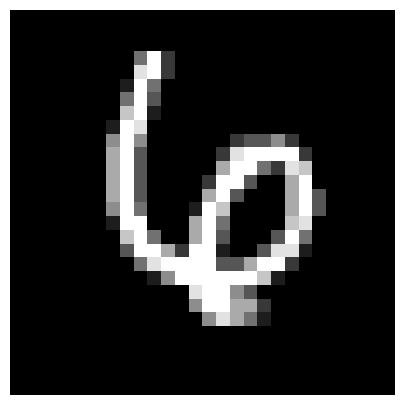

In [16]:
import matplotlib.pyplot as plt

img_tensor = x_test[22].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap="gray")
plt.axis('off')

## **Obter a saída após o segundo filtro de conv (após ReLU)**

In [ ]:

activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
Number of layer activations: 2


#### **A ativação da primeira camada de convolução para a entrada de imagem**

In [18]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [19]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 24, 24, 64)


In [20]:
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,884 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


## **A saída do mapa de características do 4º kernel da primeira camada de Conv**

/tmp/ipykernel_634/2840246597.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


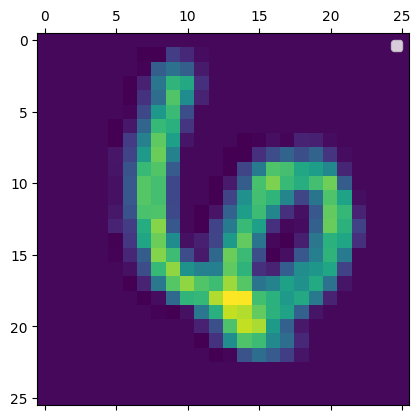

In [21]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

## **Crie uma função que exiba as ativações de camadas específicas**

In [25]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

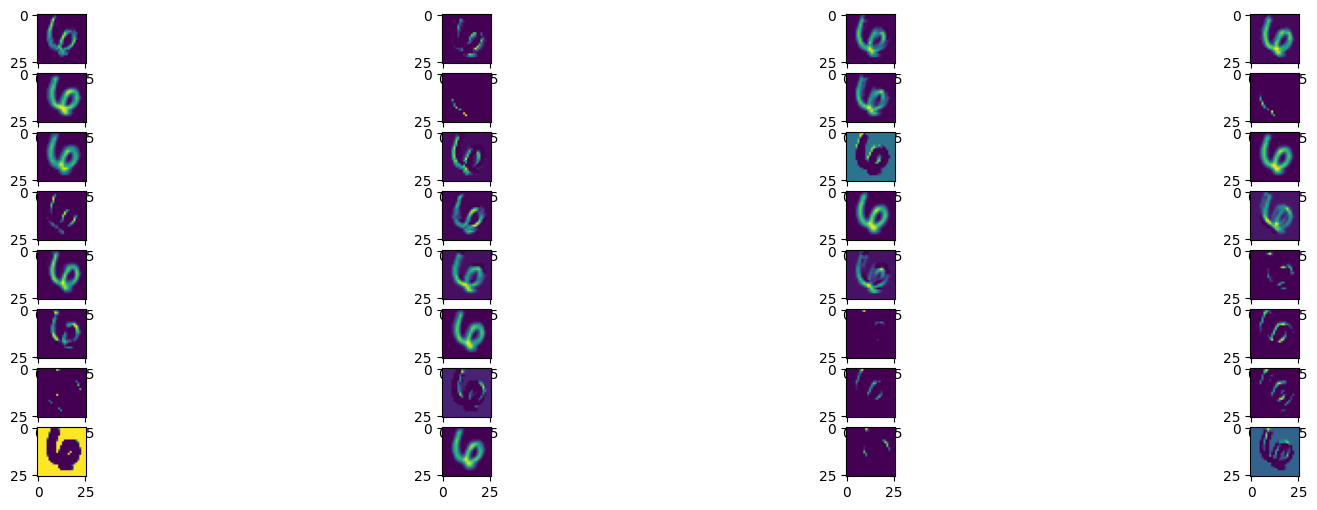

In [26]:
display_activation(activations, 4, 8, 0)